<a href="https://colab.research.google.com/github/AatiqahHarmine/PRODIGY_GA_04/blob/main/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task - 04

#Image - to - Image Translation with cGAN

Step - 01 : Setup Pix2Pix Code

This 3-line block sets up your environment by:

Downloading the repo

Moving into it

Installing required packages



In [4]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 11.73 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 863.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━

Step - 02 : Download the Dataset (Facades)

It runs a Bash script located at ./datasets/download_pix2pix_dataset.sh

The argument facades tells the script which dataset to download

This script then:

Creates a folder ./datasets/facades

Downloads the dataset ZIP file from the internet (hosted by the authors)

Unzips it into the right structure for use with Pix2Pix

In [5]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2025-06-17 10:45:26--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M   872KB/s    in 58s     

2025-06-17 10:46:25 (504 KB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16

Step - 03 : Train the Model

Runs the shell script: scripts/download_pix2pix_model.sh

Passes facades_label2photo as the model name to download

The script:

Downloads the pretrained weights from a hosted server (e.g., from people.eecs.berkeley.edu)

Saves them to the folder

In [8]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2025-06-17 11:04:35--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  15.4MB/s    in 15s     

2025-06-17 11:04:50 (13.9 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



Step - 04 : Test the Model

To evaluate how well the model performs on unseen data by:

Loading the model specified by --name (e.g., a pretrained model or one you trained)

Reading test images from the dataset path --dataroot

Running the model on each input image to produce a translated image (like label → photo)

Saving results (input, output, and real) to a folder so you can view/compare them

In [9]:
!python test.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

Step - 05 : View Results

To quickly confirm:

Whether the test step succeeded

Which images were generated

What filenames to use for display/visualization

In [10]:
import os

output_path = 'results/facades_pix2pix/test_latest/images'
if os.path.exists(output_path):
    print("Output images:")
    for fname in os.listdir(output_path):
        print(fname)
else:
    print("No output found — make sure testing has been run.")

Output images:
36_real_B.png
45_real_B.png
101_real_B.png
39_real_B.png
33_real_A.png
10_fake_B.png
100_fake_B.png
37_real_A.png
12_real_A.png
36_real_A.png
46_fake_B.png
20_real_A.png
19_real_A.png
11_real_A.png
29_fake_B.png
103_real_A.png
19_fake_B.png
10_real_A.png
29_real_B.png
2_fake_B.png
30_real_A.png
22_real_A.png
41_real_A.png
15_real_B.png
34_real_B.png
26_real_B.png
44_fake_B.png
23_real_B.png
43_real_B.png
31_fake_B.png
24_fake_B.png
13_real_B.png
18_fake_B.png
42_real_B.png
17_real_B.png
33_fake_B.png
31_real_A.png
24_real_A.png
105_real_B.png
36_fake_B.png
29_real_A.png
10_real_B.png
43_fake_B.png
102_real_B.png
14_real_B.png
27_fake_B.png
16_real_B.png
42_real_A.png
39_real_A.png
15_fake_B.png
46_real_A.png
16_fake_B.png
103_real_B.png
21_real_A.png
24_real_B.png
27_real_B.png
32_fake_B.png
105_real_A.png
4_real_B.png
18_real_A.png
4_real_A.png
23_real_A.png
21_fake_B.png
28_real_B.png
31_real_B.png
1_fake_B.png
3_real_B.png
26_real_A.png
47_real_B.png
34_fake_B.png
100

Step - 06 :

It lets you visually inspect the quality of the model's outputs.

Helps compare multiple outputs in one place.

Especially useful in research and reporting for documenting performance.

Showing: 10_fake_B.png


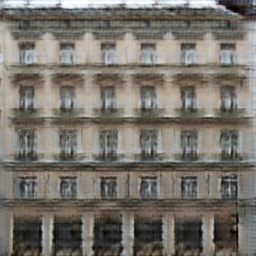

Showing: 46_fake_B.png


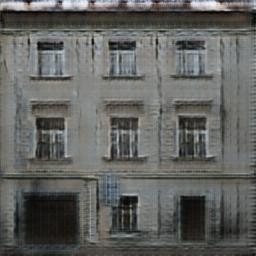

Showing: 29_fake_B.png


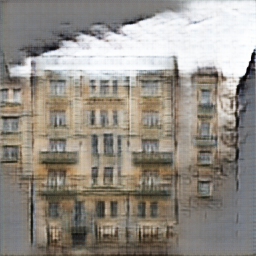

Showing: 19_fake_B.png


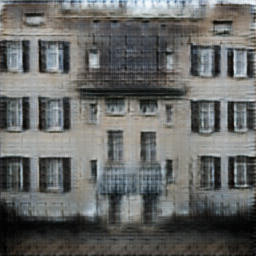

Showing: 44_fake_B.png


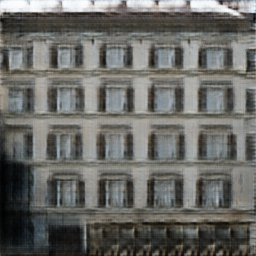

Showing: 31_fake_B.png


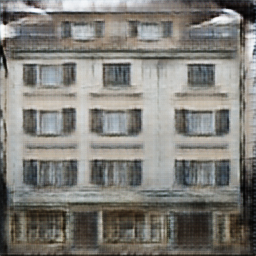

In [14]:
from IPython.display import Image, display

generated_images = [
    "10_fake_B.png", "46_fake_B.png", "29_fake_B.png",
    "19_fake_B.png", "44_fake_B.png", "31_fake_B.png"
]

for img_name in generated_images:
    print(f"Showing: {img_name}")
    display(Image(filename=f'results/facades_pix2pix/test_latest/images/{img_name}'))

Step - 07 :

To display each image pair — input (real_A) and generated output (fake_B) — next to each other in a single horizontal strip. This helps you visually evaluate how well the Pix2Pix model translated the input.

Input vs Output: 10


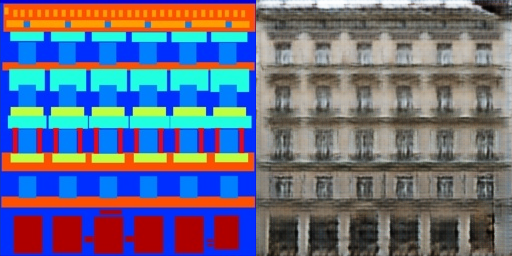

Input vs Output: 29


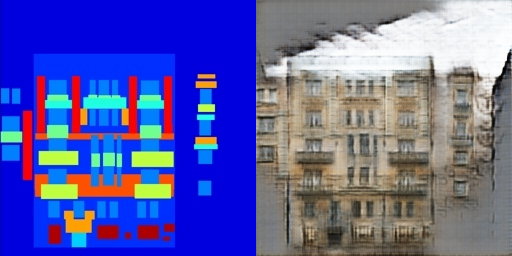

Input vs Output: 46


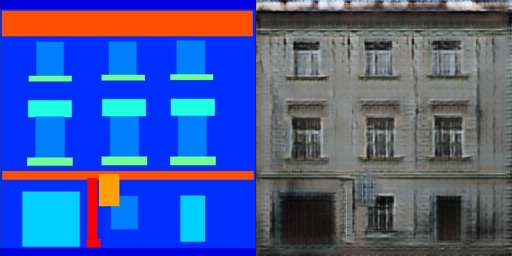

Input vs Output: 31


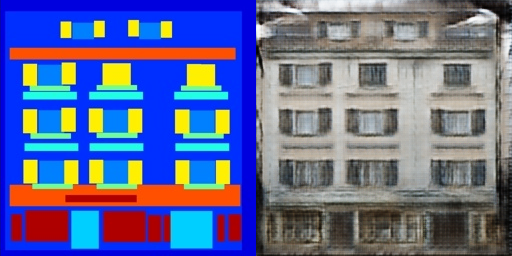

Input vs Output: 44


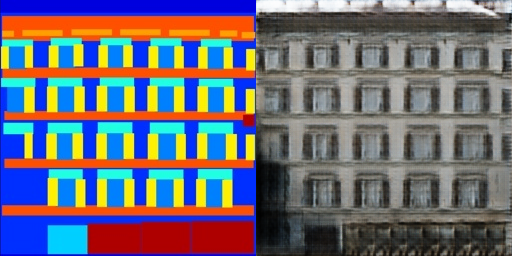

In [12]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

sample_ids = ["10", "29", "46", "31", "44"]

base_path = "results/facades_pix2pix/test_latest/images"

for id in sample_ids:
    input_path = f"{base_path}/{id}_real_A.png"
    output_path = f"{base_path}/{id}_fake_B.png"

    input_img = Image.open(input_path)
    output_img = Image.open(output_path)

    side_by_side = Image.new("RGB", (input_img.width + output_img.width, input_img.height))
    side_by_side.paste(input_img, (0, 0))
    side_by_side.paste(output_img, (input_img.width, 0))

    print(f"Input vs Output: {id}")
    display(side_by_side)

Step - 08 :

Because it gives you a clear visual comparison between what the model was given, what it produced, and what the correct answer looks like — side by side in rows, for multiple examples.

This is crucial for:

Evaluating model performance visually

Identifying strengths or weaknesses

Preparing results for reports, presentations, or papers

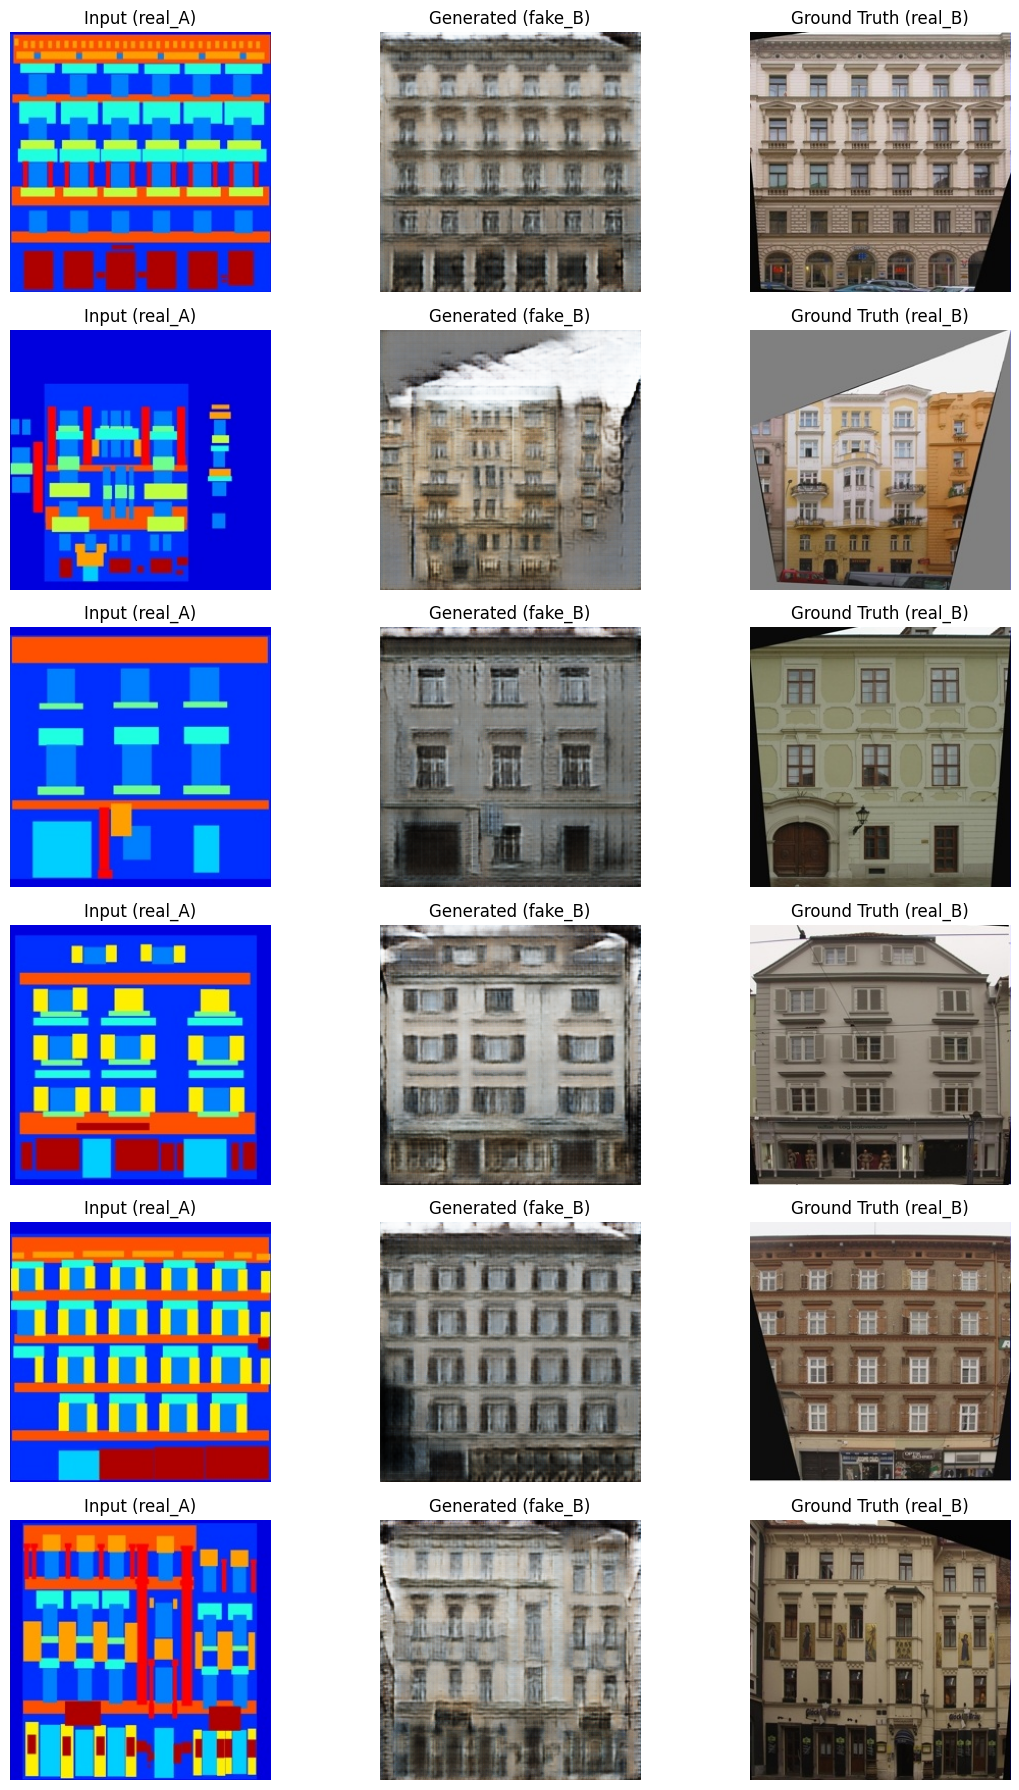

In [13]:
import matplotlib.pyplot as plt

sample_ids = ["10", "29", "46", "31", "44", "100"]
n_cols = 3

fig, axs = plt.subplots(len(sample_ids), ncols=n_cols, figsize=(12, len(sample_ids)*3))

for i, id in enumerate(sample_ids):
    real_A = Image.open(f"{base_path}/{id}_real_A.png")
    fake_B = Image.open(f"{base_path}/{id}_fake_B.png")
    real_B = Image.open(f"{base_path}/{id}_real_B.png")

    axs[i, 0].imshow(real_A)
    axs[i, 0].set_title("Input (real_A)")
    axs[i, 1].imshow(fake_B)
    axs[i, 1].set_title("Generated (fake_B)")
    axs[i, 2].imshow(real_B)
    axs[i, 2].set_title("Ground Truth (real_B)")

    for ax in axs[i]:
        ax.axis('off')

plt.tight_layout()
plt.show()